Loan Prediction Problem

In [0]:
#importing important packages
import pandas as pd
import numpy as np

#reading the dataset
df=pd.read_csv("train.csv")

#filling missing values
df['Gender'].fillna('Male', inplace=True)
df['Married'].fillna('No', inplace=True)
df['Dependents'].fillna(0, inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(0, inplace=True)
df['Loan_Amount_Term'].fillna(360.0, inplace=True)
df['Credit_History'].fillna(1.0, inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Loan_Status"] = lb_make.fit_transform(df["Loan_Status"])


In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [11]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [0]:
df = df.drop('Loan_ID',axis=1)

In [0]:
#split dataset into train and test

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=0)

x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']

x_test=test.drop('Loan_Status',axis=1)
y_test=test['Loan_Status']

#create dummies
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [14]:
y_test

454    1
52     0
536    1
469    0
55     1
      ..
242    1
515    1
582    1
225    0
134    1
Name: Loan_Status, Length: 185, dtype: int64

In [15]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
454,7085,0.0,84.0,360.0,1.0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0
52,4230,0.0,112.0,360.0,1.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
536,6133,3906.0,324.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
469,4333,2451.0,110.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
55,2708,1167.0,97.0,360.0,1.0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2965,5701.0,155.0,60.0,1.0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1
515,3466,3428.0,150.0,360.0,1.0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0
582,3166,0.0,36.0,360.0,1.0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
225,3250,0.0,170.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0


In [16]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.772972972972973

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=50,random_state=1)

# fit the model with the training data
model.fit(x_train,y_train)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(x_train)
# print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
# print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(x_test)
# print('\nTarget on test data',predict_test) 
model.score(x_test,y_test)
# accuracy_train = accuracy_score(y_test,predict_test)
# accuracy_train

Number of Trees used :  50


0.7945945945945946

In [18]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1,n_estimators=50)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8162162162162162

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=50,learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [0]:
x_train = x_train.loc[:,~x_train.columns.duplicated()]
x_test = x_test.loc[:,~x_test.columns.duplicated()]

In [21]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [24]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=y_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
   if y_pred[i]>=0.5: 
     y_pred[i]=1
else:
  y_pred[i]=0

acc = accuracy_score(y_test,y_pred)
acc


0.7189189189189189

In [0]:
!pip install catboost

     |████████████████████████████████| 63.6MB 34kB/s 


In [0]:
# from catboost import CatBoostClassifier
# model=CatBoostClassifier()
# categorical_features_indices = np.where(df.dtypes != np.float)[0]
# model.fit(x_train,y_train,cat_features=([ 0,  1]),eval_set=(x_test, y_test))
# model.score(x_test,y_test)

CatBoostError: ignored

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Average number of nodes 13396
Average maximum depth 46


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


Recall Baseline: 1.0 Test: 0.96 Train: 1.0
Precision Baseline: 0.81 Test: 0.88 Train: 1.0
Roc Baseline: 0.5 Test: 0.87 Train: 1.0


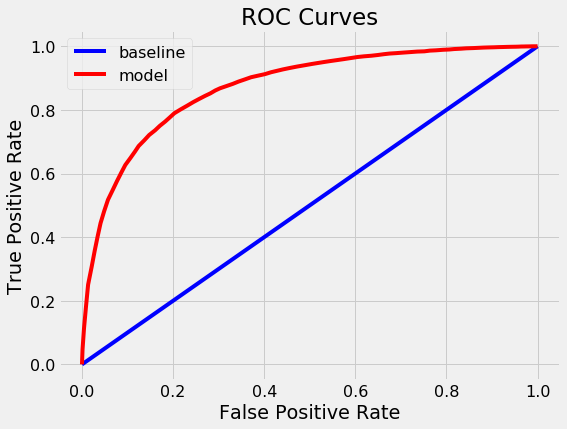

Confusion matrix, without normalization
[[ 2438  3136]
 [ 1043 23299]]


<Figure size 432x288 with 0 Axes>

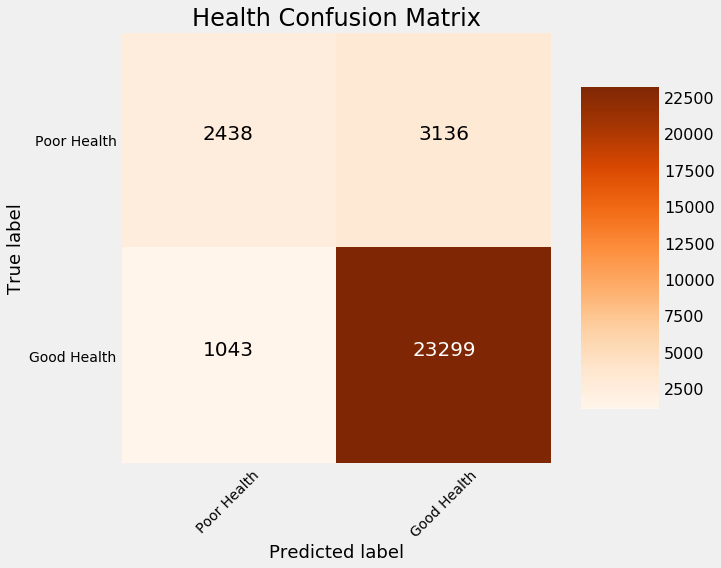

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

RSEED = 50

# Load in data
df = pd.read_csv('https://s3.amazonaws.com/projects-rf/clean_data.csv')

# Full dataset: https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system

# Extract the labels
labels = np.array(df.pop('label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)

# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm.png')

Boston House Prediction - Regression


In [28]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load data
dataset = load_boston()
X, y = dataset.data, dataset.target
features = dataset.feature_names

SEED = 2019

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)
print(X_train.shape[0])
print(X_test.shape[0])

# Fit and predict
tree = DecisionTreeRegressor(max_depth=3, random_state=SEED)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('R2 score on testing data: {:.2f}%'.format(100*r2_score(y_test, y_pred)))

404
102
R2 score on testing data: 60.11%


In [31]:
dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Fit and predict
rf = RandomForestRegressor(random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2 score on testing data: {:.2f}%'.format(100*r2_score(y_test, y_pred)))

R2 score on testing data: 78.53%


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
feat_imp = rf.feature_importances_
feat_imp

array([0.03679001, 0.00096757, 0.00527875, 0.0009287 , 0.0072132 ,
       0.47475279, 0.01682532, 0.06336636, 0.00368608, 0.01860882,
       0.01051954, 0.00968036, 0.35138249])

In [32]:
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import time

# Initialize instances of GBM models
gbm_models = [GradientBoostingRegressor(random_state=SEED), 
              LGBMRegressor(random_state=SEED), 
              XGBRegressor(random_state=SEED)]

# Loop over models
for gbm in gbm_models:
    # Measure time
    start_time = time.time()
    # Fit and predict
    gbm.fit(X_train, y_train)
    y_pred = gbm.predict(X_test)
    # Print info
    print('Model: {} \n R2 score on testing data: {:.2f}% \n Execution time: {:.2}sec'.format(
          gbm.__class__.__name__, 100*r2_score(y_test, y_pred), time.time()-start_time))

Model: GradientBoostingRegressor 
 R2 score on testing data: 79.45% 
 Execution time: 0.061sec
Model: LGBMRegressor 
 R2 score on testing data: 78.72% 
 Execution time: 0.051sec
[13:08:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model: XGBRegressor 
 R2 score on testing data: 80.75% 
 Execution time: 0.042sec
